In [ ]:
!pip install -q pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.3 MB/s eta 0:00:00:00:010:01


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd
import pickle
import scipy.stats as stats
import pycountry
from datetime import datetime, timedelta
from tqdm import tqdm
from scipy import stats
import scipy
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tools import add_constant
from collections import defaultdict, Counter
from itertools import chain, combinations
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter

In [ ]:
import matplotlib
matplotlib.rcParams['font.size'] = 30

### Regional Data & Statistics

In [ ]:
regions = {
    'Middle East': ['AE', 'BH', 'IQ', 'IL', 'JO', 'KW', 'LB', 'OM', 'QA', 'SA', 'YE'],
    'North Africa': ['DZ', 'EG', 'LY', 'MA', 'TN'],
    'North America': ['CA', 'US'],
    'South Asia': ['BD', 'IN', 'LK', 'NP', 'PK'],
    'Caribbean': ['JM', 'PR', 'DO'],
    'Southeast Asia': ['ID', 'KH', 'LA', 'MY', 'PH', 'SG', 'TH', 'VN'],
    'East Asia': ['HK', 'JP', 'KR', 'MN', 'TW'],
    'Europe': ['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 
               'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT', 'LU', 
               'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'RU', 
               'SE', 'SI', 'SK', 'UA'],
    'Latin America': ['AR', 'BO', 'BR', 'CL', 'CO', 'CR', 'DO', 'EC', 'GT', 'HN', 'MX', 
                     'NI', 'PA', 'PE', 'PR', 'PY', 'SV', 'UY', 'VE'],
    'Sub-Saharan Africa': ['GH', 'KE', 'NG', 'SN', 'TZ', 'UG', 'ZA', 'ZW'],
    'Oceania': ['AU', 'NZ', 'PG'],
    'Central Asia': ['AM', 'AZ', 'GE', 'KZ'],
}

hdi_index_by_country = {
    'US': 0.927,  # United States
    #'BY': 0.801,  # Belarus
    'RS': 0.805,  # Serbia
    'LK': 0.780,  # Sri Lanka
    'DE': 0.950,  # Germany
    'KW': 0.847,  # Kuwait
    'BH': 0.888,  # Bahrain
    'MY': 0.807,  # Malaysia
    'PE': 0.762,  # Peru
    'KH': 0.600,  # Cambodia
    'ZW': 0.550,  # Zimbabwe (updated)
    'DO': 0.766,  # Dominican Republic
    'LU': 0.927,  # Luxembourg
    'RO': 0.827,  # Romania
    'EE': 0.899,  # Estonia
    'AU': 0.946,  # Australia
    'CA': 0.935,  # Canada
    'PK': 0.540,  # Pakistan (updated)
    'QA': 0.875,  # Qatar
    'BD': 0.670,  # Bangladesh
    'TH': 0.803,  # Thailand
    'EG': 0.728,  # Egypt
    'AL': 0.789,  # Albania
    'MA': 0.698,  # Morocco
    'UA': 0.734,  # Ukraine
    'TN': 0.732,  # Tunisia
    'FR': 0.910,  # France
    'DZ': 0.745,  # Algeria
    'LA': 0.620,  # Lao PDR
    'AM': 0.786,  # Armenia
    'YE': 0.424,  # Yemen (updated)
    'AZ': 0.760,  # Azerbaijan
    'ZA': 0.717,  # South Africa
    'UG': 0.550,  # Uganda (updated)
    'HN': 0.624,  # Honduras
    'CY': 0.907,  # Cyprus
    'PY': 0.731,  # Paraguay
    'BO': 0.698,  # Bolivia
    'KZ': 0.802,  # Kazakhstan
    'MD': 0.763,  # Moldova
    'LY': 0.746,  # Libya
    'VE': 0.699,  # Venezuela
    'MK': 0.765,  # North Macedonia
    'IS': 0.959,  # Iceland
    'ES': 0.911,  # Spain
    'CH': 0.967,  # Switzerland
    'ME': 0.844,  # Montenegro
    'JP': 0.920,  # Japan
    'KR': 0.929,  # Korea, Republic of
    'CZ': 0.895,  # Czech Republic
    'PR': None,   # Puerto Rico (no data provided)
    'HR': 0.878,  # Croatia
    'GT': 0.629,  # Guatemala
    'DK': 0.952,  # Denmark
    'SN': 0.517,  # Senegal (updated)
    'IL': 0.915,  # Israel
    'AR': 0.849,  # Argentina
    'SK': 0.855,  # Slovakia
    'HK': 0.956,  # Hong Kong
    'GH': 0.602,  # Ghana
    'ID': 0.713,  # Indonesia
    'HU': 0.851,  # Hungary
    'NP': 0.601,  # Nepal
    'GR': 0.893,  # Greece
    'MX': 0.781,  # Mexico
    'MN': 0.741,  # Mongolia
    'RU': 0.821,  # Russian Federation
    'LB': 0.723,  # Lebanon
    'BG': 0.799,  # Bulgaria
    'TW': 0.916,   # Taiwan (no data provided)
    'IE': 0.950,  # Ireland
    'PT': 0.874,  # Portugal
    'PA': 0.820,  # Panama
    'JO': 0.736,  # Jordan
    'NI': 0.669,  # Nicaragua
    'PH': 0.710,  # Philippines
    'NL': 0.946,  # Netherlands
    'PL': 0.881,  # Poland
    'LV': 0.879,  # Latvia
    'SG': 0.949,  # Singapore
    'IQ': 0.673,  # Iraq
    'EC': 0.765,  # Ecuador
    'SV': 0.674,  # El Salvador
    'CL': 0.860,  # Chile
    'LI': 0.942,  # Liechtenstein
    'BR': 0.760,  # Brazil
    'MT': 0.915,  # Malta
    'JM': 0.706,  # Jamaica
    'SE': 0.952,  # Sweden
    'TZ': 0.532,  # Tanzania (updated)
    #'TR': 0.855,  # Turkey
    'CR': 0.806,  # Costa Rica
    'FI': 0.942,  # Finland
    'GE': 0.814,  # Georgia
    'SA': 0.875,  # Saudi Arabia
    'PG': 0.568,  # Papua New Guinea (updated)
    'IN': 0.644,  # India
    'LT': 0.879,  # Lithuania
    'VN': 0.726,  # Vietnam
    'IT': 0.906,  # Italy
    'NZ': 0.939,  # New Zealand
    'AT': 0.926,  # Austria
    'AE': 0.937,  # United Arab Emirates
    'UY': 0.830,  # Uruguay
    'CO': 0.758,  # Colombia
    'KE': 0.601,  # Kenya
    'SI': 0.926,  # Slovenia
    'NG': 0.548,  # Nigeria (updated)
    'GB': 0.940,  # United Kingdom
    'BE': 0.942,  # Belgium
    'BA': 0.779,  # Bosnia and Herzegovina
    'OM': 0.819,  # Oman
    'NO': 0.966   # Norway
}

country_languages_official = {
    'AL': ['sq'], 'AT': ['de-AT'], 'BA': ['bs', 'hr', 'sr-Cyrl', 'sr-Latn'], 'BE': ['nl-BE', 'fr-BE', 'de-BE'],
    'BG': ['bg'], 'CY': ['el', 'tr'], 'CZ': ['cs'], 'DE': ['de-DE'], 'DK': ['da'], 'EE': ['et'], 'ES': ['es-ES'],
    'FI': ['fi', 'sv'], 'FR': ['fr-FR'], 'GB': ['en-GB'], 'GR': ['el'], 'HR': ['hr'], 'HU': ['hu'], 'IE': ['en-IE', 'ga'],
    'IS': ['is'], 'IT': ['it'], 'LT': ['lt'], 'LU': ['lb', 'fr-LU', 'de-LU'], 'LV': ['lv'], 'ME': ['sr-Cyrl', 'sr-Latn'],
    'MK': ['mk'], 'NL': ['nl-NL'], 'PL': ['pl'], 'PT': ['pt-PT'], 'RO': ['ro'], 'RS': ['sr-Cyrl', 'sr-Latn'], 'RU': ['ru'],
    'SE': ['sv'], 'SI': ['sl'], 'SK': ['sk'], 'UA': ['uk']
}

country_languages_widely_spoken = {
    'AL': ['sq', 'it'], 'AT': ['de-AT', 'en-GB'], 'BA': ['bs', 'hr', 'sr-Cyrl', 'sr-Latn'], 'BE': ['nl-BE', 'fr-BE', 'de-BE', 'en-GB'],
    'BG': ['bg', 'ru'], 'CY': ['el', 'tr', 'en-GB'], 'CZ': ['cs', 'de-DE', 'en-GB'], 'DE': ['de-DE', 'en-GB', 'tr'], 'DK': ['da', 'en-GB'],
    'EE': ['et', 'ru'], 'ES': ['es-ES', 'en-GB', 'ca'], 'FI': ['fi', 'sv', 'en-GB'], 'FR': ['fr-FR', 'en-GB'], 'GB': ['en-GB'],
    'GR': ['el', 'en-GB'], 'HR': ['hr', 'en-GB'], 'HU': ['hu', 'en-GB'], 'IE': ['en-IE', 'ga'], 'IS': ['is', 'en-GB'],
    'IT': ['it', 'en-GB'], 'LT': ['lt', 'ru'], 'LU': ['lb', 'fr-LU', 'de-LU', 'en-GB'], 'LV': ['lv', 'ru'], 'ME': ['sr-Cyrl', 'sr-Latn', 'ru'],
    'MK': ['mk', 'bg', 'sr-Cyrl', 'sr-Latn'], 'NL': ['nl-NL', 'en-GB'], 'PL': ['pl', 'de-DE', 'en-GB'], 'PT': ['pt-PT', 'en-GB'],
    'RO': ['ro', 'en-GB'], 'RS': ['sr-Cyrl', 'sr-Latn', 'ru'], 'RU': ['ru'], 'SE': ['sv', 'en-GB'], 'SI': ['sl', 'en-GB'], 'SK': ['sk', 'hu', 'en-GB'],
    'UA': ['uk', 'ru']
}

catid2str = {
    2 : 'Autos & Vehicles',
    1 :  'Film & Animation',
    10 : 'Music',
    15 : 'Pets & Animals',
    17 : 'Sports',
    18 : 'Short Movies',
    19 : 'Travel & Events',
    20 : 'Gaming',
    21 : 'Videoblogging',
    22 : 'People & Blogs',
    23 : 'Comedy',
    24 : 'Entertainment',
    25 : 'News & Politics',
    26 : 'Howto & Style',
    27 : 'Education',
    28 : 'Science & Technology',
    29 : 'Nonprofits & Activism',
    30 : 'Movies',
    31 : 'Anime/Animation',
    32 : 'Action/Adventure',
    33 : 'Classics',
    34 : 'Comedy',
    35 : 'Documentary',
    36 : 'Drama',
    37 : 'Family',
    38 : 'Foreign',
    39 : 'Horror',
    40 : 'Sci-Fi/Fantasy',
    41 : 'Thriller',
    42 : 'Shorts',
    43 : 'Shows',
    44 : 'Trailers'
}
country_to_iso_regions = {
    'Europe' : {
        'AL': 'ALB',  # Albania
        'AT': 'AUT',  # Austria
        'BA': 'BIH',  # Bosnia and Herzegovina
        'BE': 'BEL',  # Belgium
        'BG': 'BGR',  # Bulgaria
        'CH': 'CHE',  # Switzerland
        'CY': 'CYP',  # Cyprus
        'CZ': 'CZE',  # Czech Republic
        'DE': 'DEU',  # Germany
        'DK': 'DNK',  # Denmark
        'EE': 'EST',  # Estonia
        'ES': 'ESP',  # Spain
        'FI': 'FIN',  # Finland
        'FR': 'FRA',  # France
        'GB': 'GBR',  # United Kingdom
        'GR': 'GRC',  # Greece
        'HR': 'HRV',  # Croatia
        'HU': 'HUN',  # Hungary
        'IE': 'IRL',  # Ireland
        'IS': 'ISL',  # Iceland
        'IT': 'ITA',  # Italy
        'LI': 'LIE',  # Liechtenstein
        'LT': 'LTU',  # Lithuania
        'LU': 'LUX',  # Luxembourg
        'LV': 'LVA',  # Latvia
        'MD': 'MDA',  # Moldova
        'ME': 'MNE',  # Montenegro
        'MK': 'MKD',  # North Macedonia
        'MT': 'MLT',  # Malta
        'NL': 'NLD',  # Netherlands
        'NO': 'NOR',  # Norway
        'PL': 'POL',  # Poland
        'PT': 'PRT',  # Portugal
        'RO': 'ROU',  # Romania
        'RS': 'SRB',  # Serbia
        'RU': 'RUS',  # Russia
        'SE': 'SWE',  # Sweden
        'SI': 'SVN',  # Slovenia
        'SK': 'SVK',  # Slovakia
        'UA': 'UKR'   # Ukraine
    },
    'Middle East' : {
        'AE': 'ARE',  # United Arab Emirates
        'BH': 'BHR',  # Bahrain
        'IQ': 'IRQ',  # Iraq
        'IL': 'ISR',  # Israel
        'JO': 'JOR',  # Jordan
        'KW': 'KWT',  # Kuwait
        'LB': 'LBN',  # Lebanon
        'OM': 'OMN',  # Oman
        'QA': 'QAT',  # Qatar
        'SA': 'SAU',  # Saudi Arabia
        'YE': 'YEM'   # Yemen
    },
    'North Africa': {
        'DZ': 'DZA',  # Algeria
        'EG': 'EGY',  # Egypt
        'LY': 'LBY',  # Libya
        'MA': 'MAR',  # Morocco
        'TN': 'TUN'   # Tunisia
    },
    'North America' : {
        'CA': 'CAN',  # Canada
        'US': 'USA'   # United States of America
    },
    'South Asia': {
    'BD': 'BGD',  # Bangladesh
    'IN': 'IND',  # India
    'LK': 'LKA',  # Sri Lanka
    'NP': 'NPL',  # Nepal
    'PK': 'PAK'   # Pakistan
},
'Caribbean':{
    'JM': 'JAM',  # Jamaica
    'PR': 'PRI',  # Puerto Rico
    'DO': 'DOM'   # Dominican Republic
},
'Southeast Asia': {
    'ID': 'IDN',  # Indonesia
    'KH': 'KHM',  # Cambodia
    'LA': 'LAO',  # Laos
    'MY': 'MYS',  # Malaysia
    'PH': 'PHL',  # Philippines
    'SG': 'SGP',  # Singapore
    'TH': 'THA',  # Thailand
    'VN': 'VNM'   # Vietnam
},
'East Asia': {
    'HK': 'HKG',  # Hong Kong
    'JP': 'JPN',  # Japan
    'KR': 'KOR',  # South Korea
    'MN': 'MNG',  # Mongolia
    'TW': 'TWN'   # Taiwan
},
'Latin America':{
    'AR': 'ARG',  # Argentina
    'BO': 'BOL',  # Bolivia
    'BR': 'BRA',  # Brazil
    'CL': 'CHL',  # Chile
    'CO': 'COL',  # Colombia
    'CR': 'CRI',  # Costa Rica
    'DO': 'DOM',  # Dominican Republic
    'EC': 'ECU',  # Ecuador
    'GT': 'GTM',  # Guatemala
    'HN': 'HND',  # Honduras
    'MX': 'MEX',  # Mexico
    'NI': 'NIC',  # Nicaragua
    'PA': 'PAN',  # Panama
    'PE': 'PER',  # Peru
    'PR': 'PRI',  # Puerto Rico
    'PY': 'PRY',  # Paraguay
    'SV': 'SLV',  # El Salvador
    'UY': 'URY',  # Uruguay
    'VE': 'VEN'   # Venezuela
},
'Sub-Saharan Africa':{
    'GH': 'GHA',  # Ghana
    'KE': 'KEN',  # Kenya
    'NG': 'NGA',  # Nigeria
    'SN': 'SEN',  # Senegal
    'TZ': 'TZA',  # Tanzania
    'UG': 'UGA',  # Uganda
    'ZA': 'ZAF',  # South Africa
    'ZW': 'ZWE'   # Zimbabwe
},
'Oceania':{
    'AU': 'AUS',  # Australia
    'NZ': 'NZL',  # New Zealand
    'PG': 'PNG'   # Papua New Guinea
},
'Central Asia': {
    'AM': 'ARM',  # Armenia
    'AZ': 'AZE',  # Azerbaijan
    'GE': 'GEO',  # Georgia
    'KZ': 'KAZ'   # Kazakhstan
}    
}

### Data Loading

In [ ]:
def filter_dataframe(df):
    return df.query("view_count < 0.5e9 and days_after_pub_to_first_trend >= 0").reset_index(drop=True)

def load_country_data(country_code):
    """Load data for a specific country and return emoji usage statistics"""
    try:
        df = pd.read_csv(f"../dat/dataset_with_features_{country_code}.csv")
        df = filter_dataframe(df)
        return df
    except FileNotFoundError:
        print(f"No data found for {country_code}")
        return None
full_dataset_by_country = {}
for region in tqdm(regions):
    for country_code in regions[region]:
        df = load_country_data(country_code)
        full_dataset_by_country[country_code] = (df.iloc[df['video_id'].drop_duplicates().index]).reset_index(drop=True)

100%|██████████| 12/12 [01:37<00:00,  8.11s/it]


# 1. Cross-Country Analysis of Emoji Prevalence in Trending Videos

We start by selecting two countries and ensuring our data meets the independence criteria required for a Welch t-test. First, we remove duplicate videos in each country. Then, we check that no more than 15% of videos are shared between the two countries and drop any common videos to avoid overlap. Finally, if a channel has multiple trending videos, we randomly pick one. With these steps, our data is independent and has large enough sample sizes for normality.

We compare two countries to determine if Country A’s trending videos contain fewer emojis in their titles than Country B’s. The null hypothesis assumes no difference, while the alternative suggests Country A has fewer emojis on average. With over 500 samples per group, the dataset meets the assumptions for Welch’s one-tailed t-test (α = 0.05), which accounts for unequal variances.

In [ ]:
def compare_country_emojis(C1, C2, alpha=0.05):
    """
    Compare average emoji counts between two countries while ensuring dataset independence.
    
    Parameters:
    - C1, C2 (str): Country codes to compare.
    - alpha (float): Significance level for hypothesis testing (default 0.05).
    
    Uses Welch's t-test to assess whether C1's mean emoji count is significantly lower than C2's.
    """
    c1_data = full_dataset_by_country[C1]
    c2_data = full_dataset_by_country[C2]
    
    c1_videos = set(c1_data['video_id'])
    c2_videos = set(c2_data['video_id'])
    
    common_videos = c1_videos & c2_videos
    if len(common_videos) / min(len(c1_videos), len(c2_videos)) > 0.16:
        print(f"Too much overlap between {C1} and {C2}, skipping comparison.")
        return
    
    c1_channels = c1_data.drop_duplicates(subset='channel_name')
    c2_channels = c2_data.drop_duplicates(subset='channel_name')
    
    common_channels = set(c1_channels['channel_id']) & set(c2_channels['channel_id'])
    c1_filtered = c1_channels[~c1_channels['channel_id'].isin(common_channels)]
    c2_filtered = c2_channels[~c2_channels['channel_id'].isin(common_channels)]
    
    if c1_filtered.empty or c2_filtered.empty:
        print(f"Not enough unique data for comparison: {C1} ({len(c1_filtered)}), {C2} ({len(c2_filtered)})")
        return
    
    t_test_result = stats.ttest_ind(
        c1_filtered['emoji_count'],
        c2_filtered['emoji_count'],
        equal_var=False, alternative='less'
    )
    
    print(f"{C1} has {'significantly' if t_test_result.pvalue < alpha else 'no significant'} fewer emojis than {C2} (p={t_test_result.pvalue:.4f})")
    return t_test_result.pvalue

### Plot map

In [ ]:
def create_world_emoji_map(emoji_count_distribution_c2c, country_to_iso_regions):
    """
    Generate a choropleth map of emoji usage by country.
    
    Parameters:
    - emoji_count_distribution_c2c (dict): Emoji counts per country grouped by region.
    - country_to_iso_regions (dict): Mapping of country codes (ISO2 to ISO3) per region.
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[world['continent'] != 'Antarctica'].to_crs('ESRI:54030')
    
    country_means = {
        country_to_iso_regions[region].get(country): np.mean(values)
        for region, region_data in emoji_count_distribution_c2c.items()
        for country, values in region_data.items()
        if country in country_to_iso_regions[region]
    }
    
    world['emoji_mean'] = world['iso_a3'].map(country_means)
    cmap = LinearSegmentedColormap.from_list('custom_blues', ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594'])
    
    vmin, vmax = (min(country_means.values()), max(country_means.values())) if country_means else (0, 1)
    
    world.plot(column='emoji_mean', ax=ax, cmap=cmap, vmin=vmin, vmax=vmax,
               legend=True, legend_kwds={'label': 'Mean Emoji Count', 'orientation': 'horizontal'},
               missing_kwds={'color': 'lightgrey'})
    
    ax.axis('off')
    plt.tight_layout()

In [ ]:
emoji_count_distribution_c2c = {}
for region in tqdm(regions):
    emoji_count_distribution_c2c[region] = {}
    for country_code in regions[region]:
        emoji_count_distribution_c2c[region][country_code] = full_dataset_by_country[country_code].iloc[full_dataset_by_country[country_code]['video_id'].drop_duplicates().index]['emoji_count'].values

100%|██████████| 12/12 [00:00<00:00, 34.69it/s]


<ipython-input-7-c87ebedf7190>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


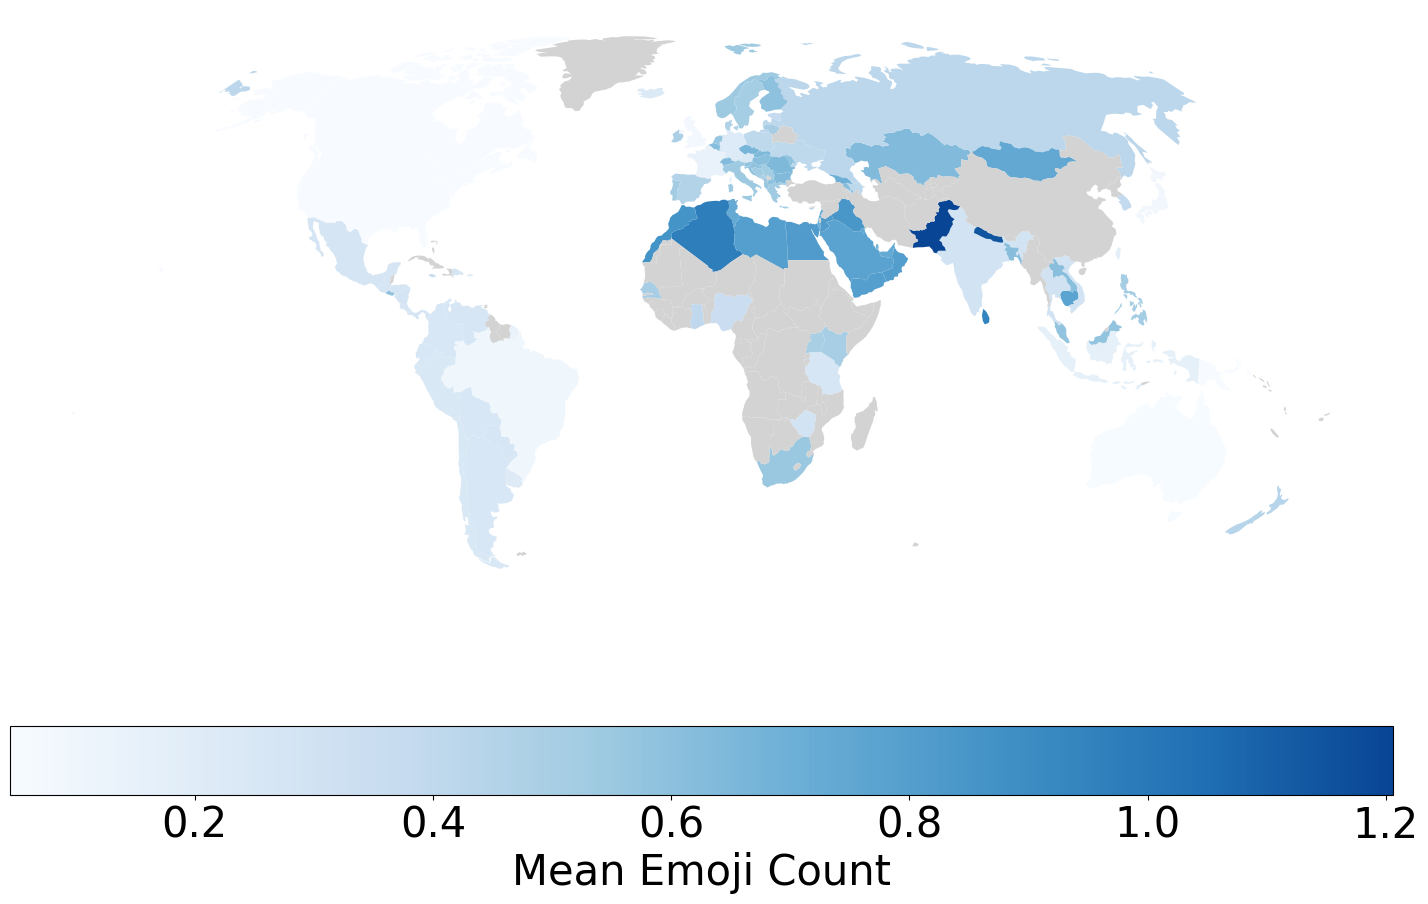

In [ ]:
create_world_emoji_map(emoji_count_distribution_c2c, country_to_iso_regions)
plt.savefig('experiment1_visualization_1.pdf', bbox_inches='tight', pad_inches=0)

We analyze and visualize the statistical significance of differences in emoji usage between Middle Eastern and European/North American countries. The goal is to identify whether certain countries use significantly more or fewer emojis compared to others.

In [ ]:
# We'll report these pvalues
compare_country_emojis("US", "AE")
compare_country_emojis("GB", "AE");

US has significantly fewer emojis than AE (p=0.0000)
GB has significantly fewer emojis than AE (p=0.0000)


In [ ]:
middle_easts = ['AE', 'BH', 'IQ', 'JO', 'KW', 'LB', 'OM', 'QA', 'SA', 'YE']
selected_countries = ['US', 'DE', 'GB', 'AT', 'NL', 'DK', 'RU', 'UA', 'NO', 'CZ']

In [ ]:
pvalues = {}
for country_me in middle_easts:
    for country_oth in selected_countries:
        pvalues[(country_me, country_oth)] = compare_country_emojis(country_oth, country_me)

US has significantly fewer emojis than AE (p=0.0000)
DE has significantly fewer emojis than AE (p=0.0000)
GB has significantly fewer emojis than AE (p=0.0000)
AT has significantly fewer emojis than AE (p=0.0000)
NL has significantly fewer emojis than AE (p=0.0018)
DK has significantly fewer emojis than AE (p=0.0005)
RU has significantly fewer emojis than AE (p=0.0000)
UA has significantly fewer emojis than AE (p=0.0000)
NO has significantly fewer emojis than AE (p=0.0002)
CZ has no significant fewer emojis than AE (p=0.4901)
US has significantly fewer emojis than BH (p=0.0000)
DE has significantly fewer emojis than BH (p=0.0000)
GB has significantly fewer emojis than BH (p=0.0000)
AT has significantly fewer emojis than BH (p=0.0000)
NL has significantly fewer emojis than BH (p=0.0239)
DK has significantly fewer emojis than BH (p=0.0093)
RU has significantly fewer emojis than BH (p=0.0015)
UA has significantly fewer emojis than BH (p=0.0062)
NO has significantly fewer emojis than BH (p=

In [ ]:
pvalues_initial = []
for country_pair in pvalues:
    pvalues_initial.append(pvalues[country_pair])
pvalues_corrected = scipy.stats.false_discovery_control(pvalues_initial, method='by')
for idx, country_pair in enumerate(pvalues):
    pvalues[country_pair] = pvalues_corrected[idx]

In [ ]:
FONTSIZE=25
def visualize_directional_pvalues(pvalues, figsize=(18, 16), 
                                 cmap='viridis_r', alpha=0.05):
    """
    Visualizes directional p-values in country comparisons with clear axis labeling.
    
    Parameters:
    pvalues (dict): {(origin_country, comparison_country): p-value}
    figsize (tuple): Figure dimensions
    cmap (str): Matplotlib colormap
    alpha (float): Significance threshold
    
    Returns:
    matplotlib Axes object
    """
    
    origin_countries = sorted({c1 for c1, _ in pvalues.keys()})
    comparison_countries = sorted({c2 for _, c2 in pvalues.keys()})
    
    df = pd.DataFrame(
        index=pd.Index(origin_countries, name='Selected Middle east country'),
        columns=pd.Index(comparison_countries, name='Selected European country'),
        dtype=float
    )
    
    for (origin, comp), p in pvalues.items():
        if origin in df.index and comp in df.columns:
            df.loc[origin, comp] = p

    fig, ax = plt.subplots(figsize=figsize)
    
    current_cmap = plt.get_cmap(cmap)
    current_cmap.set_over('white')

    sns.heatmap(
        df,
        cmap=current_cmap,
        annot=True,
        fmt=".2f",
        linewidths=2,
        linecolor='black',
        cbar_kws={
            'label': f'p-value (α={alpha}; white: not significant)',
            'format': '%.2f',
            'extend': 'max'
        },
        vmin=0,
        vmax=alpha,
        ax=ax,
        annot_kws={'fontsize': 18},

    )
    
    significant = df < alpha
    for (i, j), val in np.ndenumerate(significant.values):
        if val and not np.isnan(df.iloc[i, j]):
            ax.add_patch(
                plt.Rectangle(
                    (j, i), 1, 1,
                    fill=False,
                    edgecolor='gold',
                    lw=1.5,
                    clip_on=False
                )
            )
            
    plt.xticks(rotation=45, ha='right', fontsize=FONTSIZE)
    plt.yticks(rotation=0, fontsize=FONTSIZE)
    
    cbar = ax.collections[0].colorbar
    cbar.ax.axhline(alpha, color='white', linestyle='--', linewidth=1.5)
    cbar.ax.text(1.1, alpha, 'Significance\nThreshold', 
                transform=cbar.ax.transAxes,
                va='center',
                color='white',
                fontweight='bold',
                fontsize=FONTSIZE
                )

    ax.xaxis.label.set_size(FONTSIZE+5)
    ax.yaxis.label.set_size(FONTSIZE+5)
    cbar.ax.xaxis.label.set_size(FONTSIZE)
    cbar.ax.yaxis.label.set_size(FONTSIZE)
    cbar.ax.tick_params(labelsize=FONTSIZE)
    
    return ax


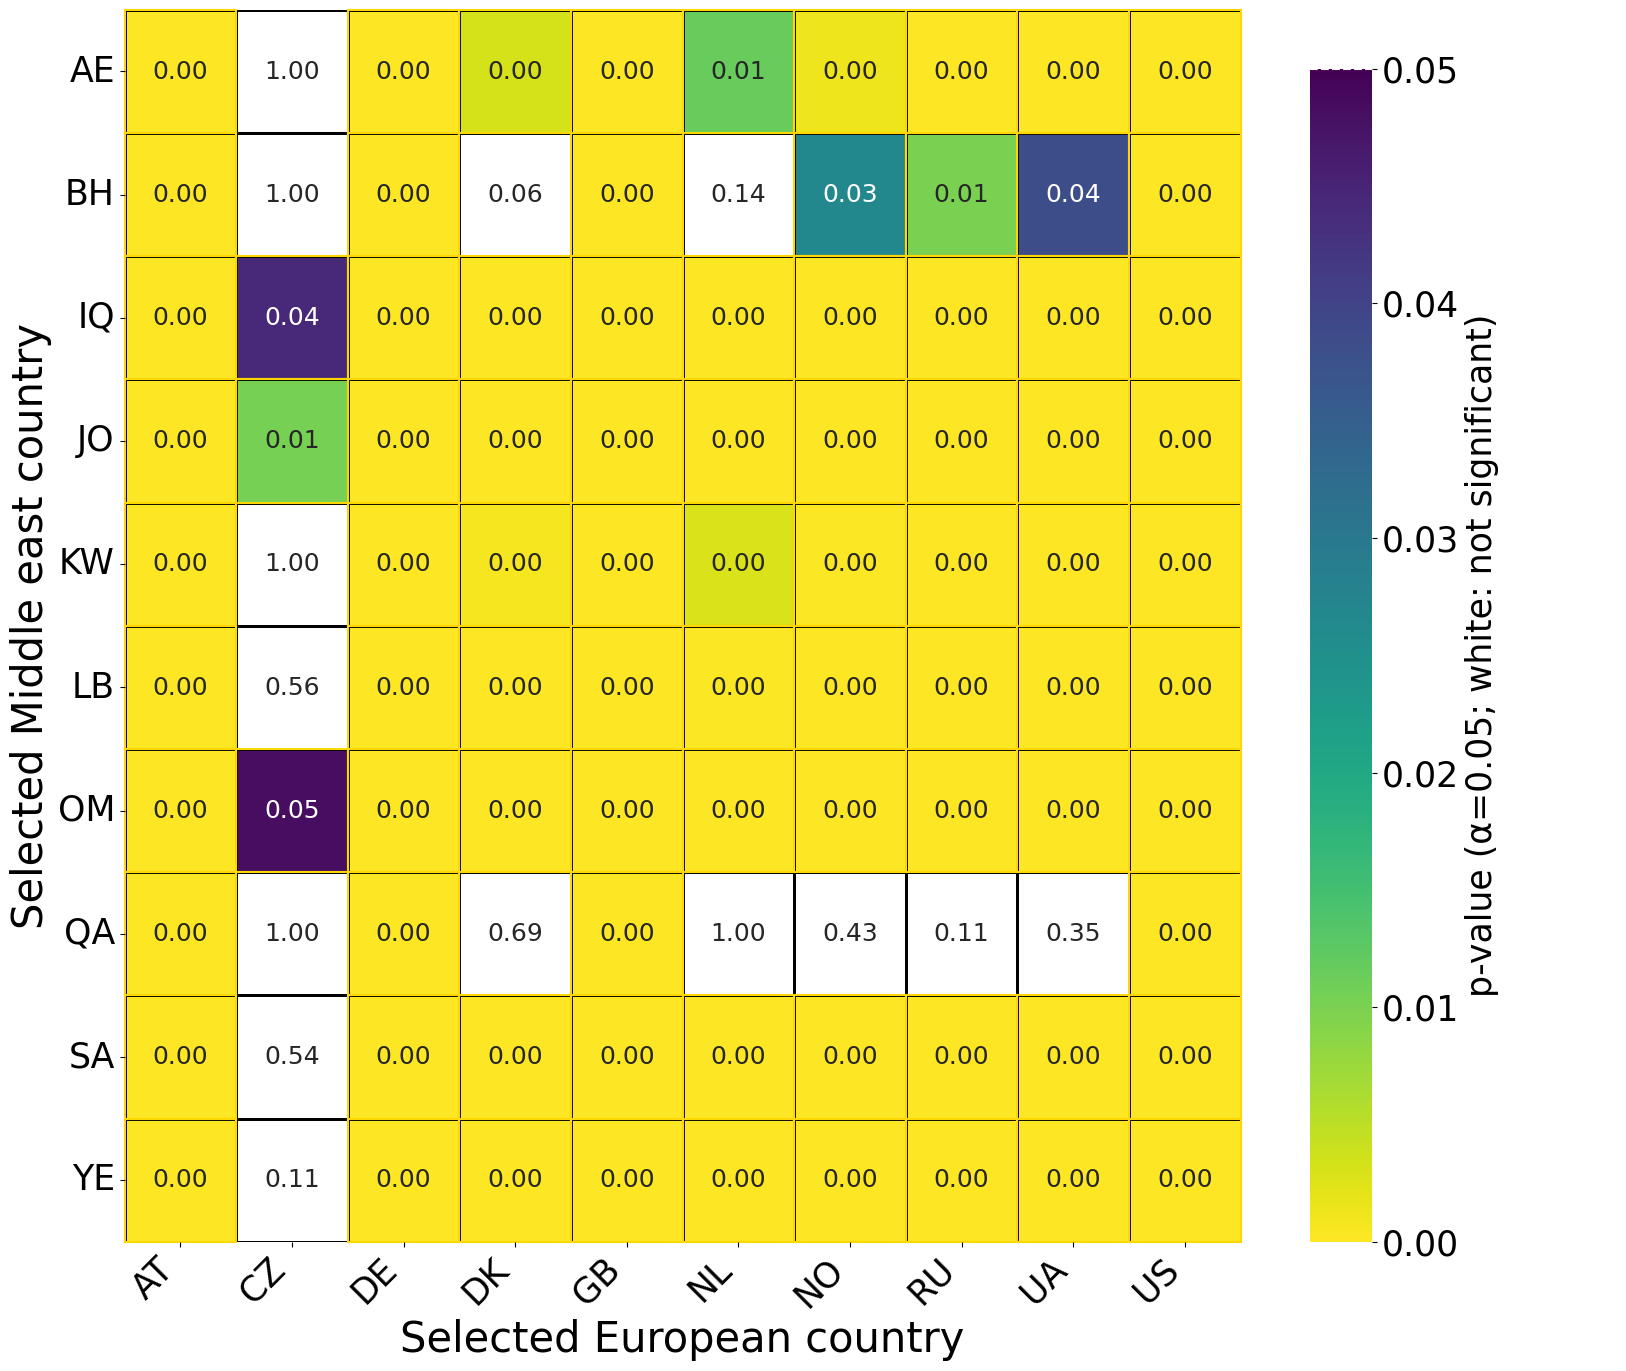

In [15]:
visualize_directional_pvalues(pvalues)
plt.savefig('experiment1_visualization_2.pdf', bbox_inches='tight', pad_inches=0)